In [31]:
import numpy
import pandas
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

## Data File

In [32]:
filepath = "C:\\PythonScripts\\Data Science Essentials\\data.csv"
balance_data = pandas.read_csv(filepath, sep=',', header=0)

In [33]:
balance_data.drop(columns=['sum'], inplace=True)
balance_data.columns = ['initial_payment', 'last_payment', 'credit_score', 'house_number', 'result']

In [34]:
balance_data.head(10)

,initial_payment,last_payment,credit_score,house_number,result
0,201,10018,250,3046,yes
1,205,10016,395,3044,yes
2,257,10129,109,3251,yes
3,246,10064,324,3137,yes
4,117,10115,496,3094,yes
5,406,10187,166,3068,yes
6,461,10252,172,3062,yes
7,158,10192,144,3469,yes
8,136,10376,230,3223,yes
9,194,10092,626,3083,yes


In [35]:
balance_data.shape

(1000, 5)

In [36]:
list(balance_data.columns)

['initial_payment', 'last_payment', 'credit_score', 'house_number', 'result']

## Decision Tree Modeling

In [37]:
x = balance_data.values[:, 0:4]
y = balance_data.values[:, -1]

In [38]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=100)

In [39]:
clf_entropy = DecisionTreeClassifier(criterion='entropy', random_state=100, max_depth=3, min_samples_leaf=5)
clf_entropy.fit(x_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=5, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=100,
            splitter='best')

In [40]:
y_pred_en = clf_entropy.predict(x_test)

In [41]:
print('Accuracy is: ', accuracy_score(y_test, y_pred_en)*100)

Accuracy is:  93.6666666667


## Visualisation

In [42]:
dot_data = export_graphviz(clf_entropy, out_file=None, feature_names = list(balance_data.columns)[:-1],
                filled=True, rounded=True,
                special_characters=True)

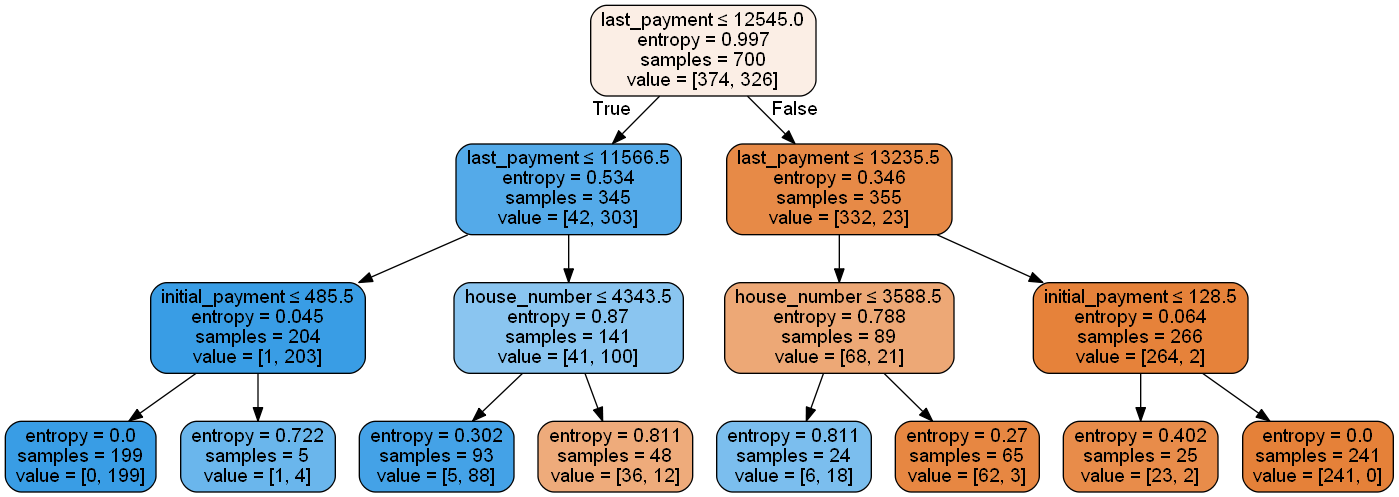

In [43]:
graph = pydotplus.graph_from_dot_data(dot_data)  
Image(graph.create_png())